# Simple raster
Create a raster based on the two-dimensional elliptical Gaussian function (https://en.wikipedia.org/wiki/Gaussian_function):

$f(x,y) = A e^{-(a(x-x_0)^2-2b(x-x_0)(y-y_0)+c(y-y_0)^2)}$

In [1]:
# Show plots inline
%matplotlib inline

from math import exp
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Define function and calculate raster values

In [2]:
def f(x,y):
    A = 5
    a = 5
    b = 0
    c = 1
    x0 = 0
    y0 = 0
    return A*np.exp( - (a*(x-x0)**2 - 2*b*(x-x0)*(y-y0) + c*(y-y0)**2))

xmin=-1
xmax=2
ymin=-1
ymax=2

x = np.linspace(xmin, xmax, 9)
y = np.linspace(ymin, ymax, 9)

X, Y = np.meshgrid(x, y)
Z = f(X,Y)
# Simple trick to show pixel values
X = X*3+3
Y = Y*3+3
Z = np.rint(Z)

### Show in 3d

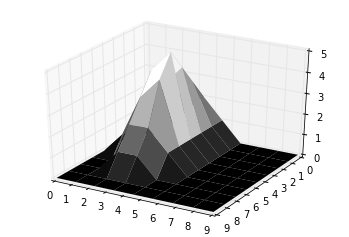

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.gca().invert_yaxis()
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gray, linewidth=0.01)
plt.show()

### Elevated pixels

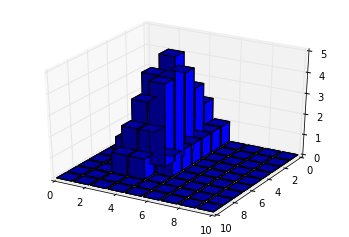

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.gca().invert_yaxis()

xpos = []
ypos = []
for i in X[0,:]:
    for j in Y[:,0]:
        xpos.append(j)
        ypos.append(i)

num_elements = len(xpos)
zpos = np.zeros(num_elements)
dx = dy = np.ones(num_elements)

ax.bar3d(xpos, ypos, zpos, dx, dy, Z.flatten())
plt.show()

### Plot raster

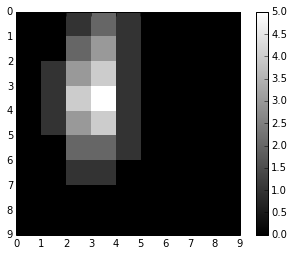

In [5]:
plt.imshow(Z, interpolation='nearest', cmap=cm.gray, extent=[0,9,9,0])
plt.colorbar()
plt.show()

### Write grid values

In [6]:
for i in range(Z.shape[0]):
    line = "\n"
    for j in range(Z.shape[1]):
        line += "%d    " % (Z[i,j])
    print line


0    0    1    2    1    0    0    0    0    

0    0    2    3    1    0    0    0    0    

0    1    3    4    1    0    0    0    0    

0    1    4    5    1    0    0    0    0    

0    1    3    4    1    0    0    0    0    

0    0    2    2    1    0    0    0    0    

0    0    1    1    0    0    0    0    0    

0    0    0    0    0    0    0    0    0    

0    0    0    0    0    0    0    0    0    


### Show terrain profile
Create a horizontal terrain profile over the highest point.

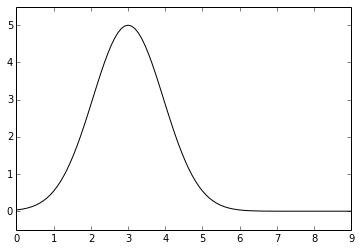

In [7]:
Xh = np.linspace(xmin, xmax, 100)
Zh = f(Xh,0)
plt.plot(Xh*3+3, Zh, 'k')
plt.axis('equal')
plt.show()